In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.utils import class_weight


In [2]:
# Memuat dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
# Nama file ZIP yang ingin dibaca
zip_file_name = "/content/drive/MyDrive/Dataset Versi 2.zip"

# Membuka file ZIP untuk membacanya
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Daftar nama file di dalam ZIP
    file_list = zip_ref.namelist()

    # Mengekstrak semua file dalam ZIP
    zip_ref.extractall()

# Menampilkan daftar file yang diekstrak
print("File yang diekstrak:", file_list)


File yang diekstrak: ['Dataset Versi 2/data_skintone/', 'Dataset Versi 2/data_skintone/Dark/', 'Dataset Versi 2/data_skintone/Dark/103674846.jpg', 'Dataset Versi 2/data_skintone/Dark/104412423.jpg', 'Dataset Versi 2/data_skintone/Dark/104880284.jpg', 'Dataset Versi 2/data_skintone/Dark/105943829.jpg', 'Dataset Versi 2/data_skintone/Dark/107217322.jpg', 'Dataset Versi 2/data_skintone/Dark/39251957.jpg', 'Dataset Versi 2/data_skintone/Dark/39252018.jpg', 'Dataset Versi 2/data_skintone/Dark/43615605.jpg', 'Dataset Versi 2/data_skintone/Dark/44981770.jpg', 'Dataset Versi 2/data_skintone/Dark/44990958.jpg', 'Dataset Versi 2/data_skintone/Dark/44991031.jpg', 'Dataset Versi 2/data_skintone/Dark/45869598.jpg', 'Dataset Versi 2/data_skintone/Dark/47287501.jpg', 'Dataset Versi 2/data_skintone/Dark/47730809.jpg', 'Dataset Versi 2/data_skintone/Dark/47789913.jpg', 'Dataset Versi 2/data_skintone/Dark/48278204.jpg', 'Dataset Versi 2/data_skintone/Dark/48474567.jpg', 'Dataset Versi 2/data_skintone/Da

In [4]:
# Function to print directory tree
def print_directory_tree(directory, indent=0, max_depth=2):
    if max_depth == 0:
        return

    for entry in os.listdir(directory):
        entry_path = os.path.join(directory, entry)
        print("-" * indent + entry)

        if os.path.isdir(entry_path) and max_depth > 1:
            print_directory_tree(entry_path, indent + 1, max_depth - 1)

In [5]:
# Specify the directory path
directory = r"/content/Dataset Versi 2/data_skintone"
print(os.listdir(directory))

['Light', 'Dark', 'Medium_tane']


In [6]:
# Print the directory tree with max_depth 2
print_directory_tree(directory, max_depth=2)

Light
-image_1662.jpg
-image_9941.jpg
-74833130.jpg
-image_7035.jpg
-image_9.jpg
-image_3137.jpg
-image_3132.jpg
-image_4454.jpg
-image_8847.jpg
-65510292.jpg
-image_7430.jpg
-image_5074.jpg
-79718949.jpg
-image_5229.jpg
-100834752.jpg
-image_10679.jpg
-image_1516.jpg
-60982432.jpg
-image_6605.jpg
-9719938.jpg
-image_3204.jpg
-image_1828.jpg
-image_6993.jpg
-89874456.jpg
-image_385.jpg
-91287155.jpg
-94584206.jpg
-image_2577.jpg
-image_9493.jpg
-image_3171.jpg
-image_4990.jpg
-101031644.jpg
-image_4994.jpg
-79333229.jpg
-image_2934.jpg
-image_9767.jpg
-81717593.jpg
-image_2701.jpg
-image_10301.jpg
-image_345.jpg
-image_5765.jpg
-image_4364.jpg
-image_5.jpg
-image_2209.jpg
-image_5706.jpg
-image_5461.jpg
-image_4186.jpg
-18521863.jpg
-108063753.jpg
-image_1039.jpg
-image_1122.jpg
-image_10125.jpg
-image_3080.jpg
-image_2706.jpg
-image_4906.jpg
-image_1820.jpg
-image_6854.jpg
-79927645.jpg
-image_1086.jpg
-image_7369.jpg
-94632086.jpg
-image_6948.jpg
-image_6403.jpg
-76182139.jpg
-869551

In [7]:
# Memuat dataset
def load_dataset(base_dir):
    images = []
    labels = []
    label_map = {'Dark': 0, 'Light': 1, 'Medium_tane': 2}
    for label in ['Dark', 'Light', 'Medium_tane']:
        class_dir = os.path.join(base_dir, label)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label_map[label])
    return np.array(images), np.array(labels)

base_dir = r"/content/Dataset Versi 2/data_skintone"
images, labels = load_dataset(base_dir)

In [8]:
# Normalisasi data
images = images / 255.0

In [9]:
# Membagi dataset menjadi training, validation, dan test set
test_ratio = 0.1
validation_ratio = 0.15
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_ratio, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

# Print jumlah gambar di masing-masing subset
print(f'Jumlah gambar di training set: {len(X_train)}')
print(f'Jumlah gambar di validation set: {len(X_validation)}')
print(f'Jumlah gambar di test set: {len(X_test)}')

Jumlah gambar di training set: 1017
Jumlah gambar di validation set: 180
Jumlah gambar di test set: 134


In [10]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_validation = tf.keras.utils.to_categorical(y_validation, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [11]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [12]:
# Menghitung class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(labels),
                                                  y=labels)
class_weights = {i : class_weights[i] for i in range(3)}


In [13]:
# Membangun model CNN dengan Dropout dan Regularisasi L2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


In [14]:
# Kompilasi model dengan learning rate yang lebih kecil dan loss function yang sesuai
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss_function = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [15]:
# Callback untuk learning rate scheduler dan early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True),  # Updated filepath
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

In [16]:
# Melatih model dengan augmentasi data dan class weights
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=200,
                    validation_data=(X_validation, y_validation),
                    class_weight=class_weights,
                    callbacks=callbacks)

Epoch 1/200
16/16 [==============================] - 12s 660ms/step - loss: 1.7031 - accuracy: 0.4169 - val_loss: 1.6998 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 2/200
16/16 [==============================] - 8s 494ms/step - loss: 1.6904 - accuracy: 0.4857 - val_loss: 1.6789 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 3/200
16/16 [==============================] - 8s 466ms/step - loss: 1.6763 - accuracy: 0.4897 - val_loss: 1.6646 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 4/200
16/16 [==============================] - 11s 695ms/step - loss: 1.6693 - accuracy: 0.4887 - val_loss: 1.6558 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 5/200
16/16 [==============================] - 8s 482ms/step - loss: 1.6602 - accuracy: 0.4916 - val_loss: 1.6473 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 6/200
16/16 [==============================] - 9s 551ms/step - loss: 1.6498 - accuracy: 0.4946 - val_loss: 1.6395 - val_accuracy: 0.4500 - lr: 1.0000e-05
Epoch 7/200
16/16 [===================

In [17]:
# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

5/5 - 0s - loss: 0.6403 - accuracy: 0.9552 - 258ms/epoch - 52ms/step

Test accuracy: 0.9552238583564758


In [18]:
# Menampilkan ringkasan model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

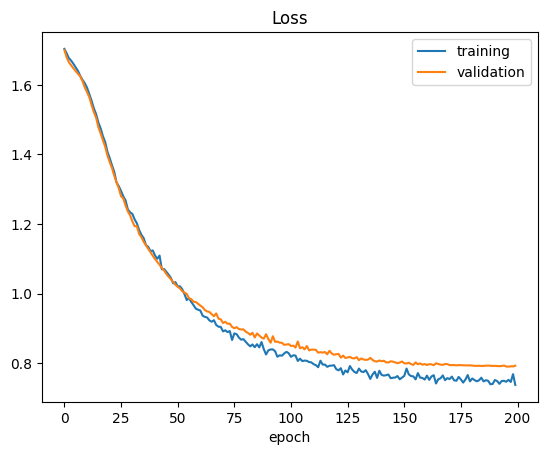

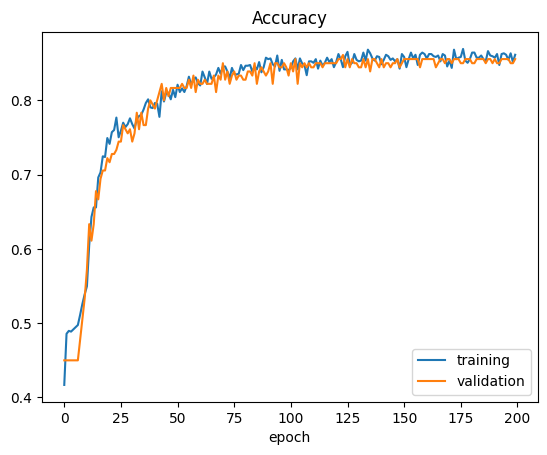

In [19]:
# Plotting loss dan accuracy
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

In [20]:
# Menyimpan model
model.save('Skintone_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# Mengunggah gambar dari sistem file
uploaded = files.upload()

Saving image_1096.jpg to image_1096.jpg


In [79]:
# Memuat gambar yang diunggah dan menampilkan gambar
for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = img_array.reshape((1, 64, 64, 3))  # Menyesuaikan dimensi untuk model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        print("Dark Skintone")
    elif predicted_class == 1:
        print("Light Skintone")
    else:
        print("Medium Skintone")

1/1 [==============================] - 0s 49ms/step
Medium Skintone
